In [131]:
import matplotlib.pyplot as plt
import numpy as np

# $\mathrm{J} \Lambda \mathbb{N} 0$ & Natalia

# 1. Analytical solutions to ODEs

In [132]:
def sol_1(t):
    return np.exp(-t)

def sol_2(t):
    return np.sqrt(2*t + 1)

def sol_3(t):
    return 1 - np.exp(-t)

def sol_4(t):
    return np.exp(t) / (1 + np.exp(t))

solutions = [sol_1, sol_2, sol_3, sol_4]

# 2. Numerical solutions to ODEs

# a) & b)

In [133]:
def func1(t, x):
    return -x

def func2(t, x):
    return 1/x

def func3(t, x):
    return 1-x

def func4(t, x):
    return x*(1-x)

functions = [func1, func2, func3, func4]

In [134]:
def euler(f_func, x_0, t_max, dt, *args, **kwargs):
    t = 0
    x = x_0

    x_t = [x_0]
    ts = [t]

    while t < t_max:
        t += dt
        ts.append(t)

        x = x + f_func(t, x, *args, **kwargs) * dt
        x_t.append(x)
        
    return np.array(ts), np.array(x_t)

In [135]:
times = []
numeric_solutions = []
for func, ic in zip([func1, func2, func3, func4], [1, 1, 0, 1/2]):
    ts, x_t = euler(f_func=func, x_0=ic, t_max=10, dt=0.01)
    times.append(np.array(ts))
    numeric_solutions.append(x_t)

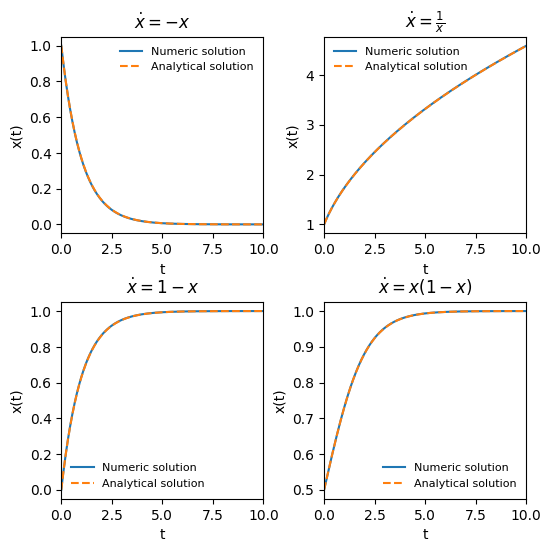

In [136]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6, 6))
plt.subplots_adjust(hspace=0.35, wspace=0.3) 

ax1.plot(times[0], numeric_solutions[0], label="Numeric solution")
ax1.plot(times[0], sol_1(times[0]), linestyle="--", label="Analytical solution")
ax1.set_title("$\\dot{x} = -x$")

ax2.plot(times[1], numeric_solutions[1], label="Numeric solution")
ax2.plot(times[1], sol_2(times[1]), linestyle="--", label="Analytical solution")
ax2.set_title("$\\dot{x} = \\frac{1}{x}$")

ax3.plot(times[2], numeric_solutions[2], label="Numeric solution")
ax3.plot(times[2], sol_3(times[2]), linestyle="--", label="Analytical solution")
ax3.set_title("$\\dot{x} = 1-x$")

ax4.plot(times[3], numeric_solutions[3], label="Numeric solution")
ax4.plot(times[3], sol_4(times[3]), linestyle="--", label="Analytical solution")
ax4.set_title("$\\dot{x} = x(1-x)$")

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim([0, 10])
    ax.set_xlabel("t")
    ax.set_ylabel("x(t)")
    ax.legend(fontsize=8, loc="best", frameon=False)

# c)

In [137]:
from scipy.integrate import solve_ivp

In [138]:
def squared_error(array_a, array_b):
    s_err = [(b - a)**2 for a, b in zip(array_a, array_b)]
    return s_err

In [139]:
def compare_solutions(func, dt, x0, t_min, t_max, sol):
    
    ts = np.arange(t_min, t_max, dt)

    ana_solution = sol(ts)
    scipy_solution = solve_ivp(func, (t_min, t_max), [x0], t_eval=ts).y[0]
    numeric_solution = euler(f_func=func, x_0=x0, t_max=t_max, dt=dt)[1]

    qe_num = squared_error(ana_solution, numeric_solution)
    qe_sci = squared_error(ana_solution, scipy_solution)

    return ts, qe_num, qe_sci

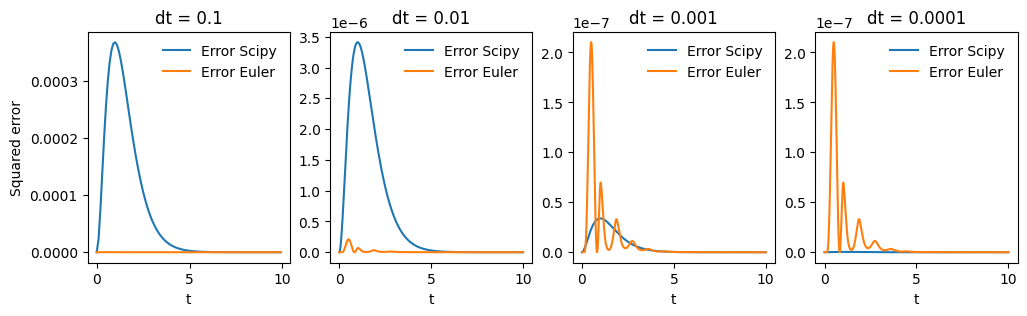

In [140]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))

for dt, ax in zip([0.1, 0.01, 0.001, 0.0001], [ax1, ax2, ax3, ax4]):
    ts, qe_num, qe_sci = compare_solutions(func=func1, dt=dt, x0=1, t_min=0, t_max=10, sol=sol_1)

    ax.plot(ts, qe_num, label="Error Scipy")
    ax.plot(ts, qe_sci, label="Error Euler")
    ax.set_title(f"dt = {dt}")
    ax.legend(frameon=False)
    ax.set_xlabel("t")
    if ax == ax1:
        ax.set_ylabel("Squared error")

# 3. Passive membrane

In [141]:
def dVdt(t, V, tau_m, E_m, R_m, I):
    return (-V + E_m + R_m*I[int(t/dt)])/tau_m

In [142]:
# Params 
simtime = 100 * 10**-3                  # 100 ms
dt = 0.1 * 10**-3                       # 0.1 ms simulation time step
R_m = 1 * 10**7                         # 10**7 Ohm
I_0 = 1 * 10**-9                        # 1 nA
tau_m = 10 * 10**-3                     # 10 ms 
E_m = -80 * 10**-3                      # 80 mV

t_array = np.arange(0, simtime + dt, dt)
I_ext = I_0 * np.ones_like(t_array)

In [143]:
ts, V_steady = euler(dVdt, x_0=E_m, tau_m=tau_m, E_m=E_m, R_m=R_m, I=I_ext, t_max=simtime, dt=dt)
ts_ms = ts/10**-3
V_steady_mV = V_steady/10**-3

Text(0.5, 0, 't (ms)')

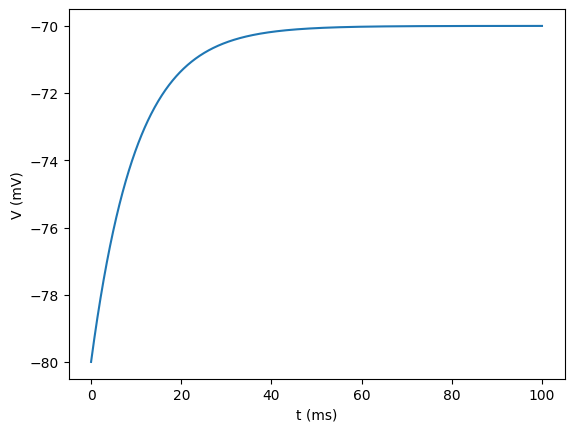

In [144]:
plt.plot(ts_ms, V_steady_mV)
plt.ylabel("V (mV)")
plt.xlabel("t (ms)")

# b)

In [145]:
f1 = 1 
f2 = 10 
f3 = 30

In [146]:
from matplotlib.gridspec import GridSpec

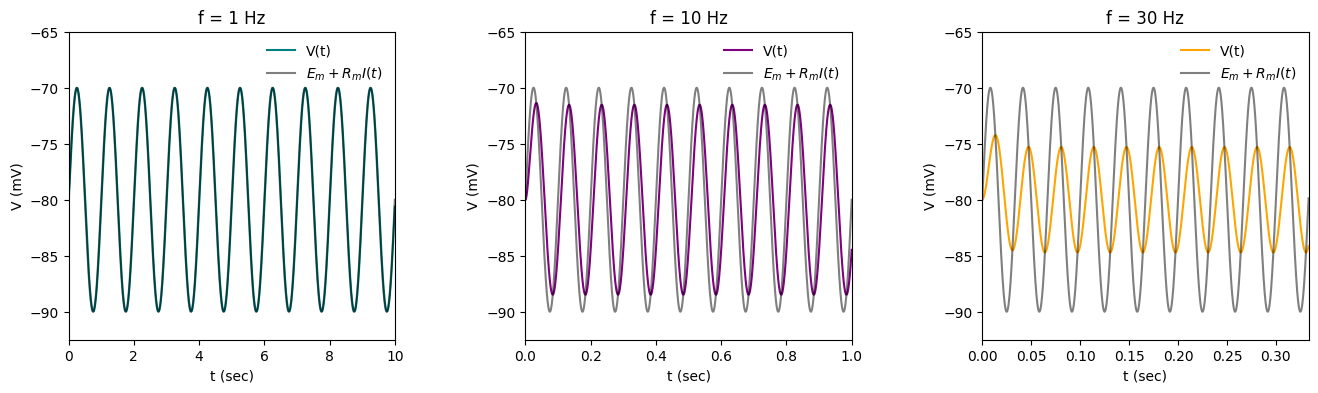

In [147]:
fig = plt.figure(figsize=(16, 4))
gs = GridSpec(1, 3, wspace=0.4)

for i, (f, c) in enumerate(zip([f1, f2, f3], ["teal", "purple", "orange"])):
    
    T = 1 / f
    t_max = T * 10 
    t_array = np.arange(0, t_max+dt, dt)
    stim = I_0 * np.sin(2*np.pi*f*t_array)

    ts, V_t = euler(dVdt, x_0=E_m, tau_m=tau_m, E_m=E_m, R_m=R_m, I=stim, t_max=t_max, dt=dt)
    si_input = E_m + R_m*stim 

    ts_ms = ts 
    V_t_mV = V_t / 10**-3
    si_input_mV = si_input / 10**-3
    
    ax1 = fig.add_subplot(gs[0, i])
    ax1.plot(ts, V_t_mV, color=c, label="V(t)")
    ax1.plot(t_array, si_input_mV, color="black", alpha=0.5, label="$E_m + R_mI(t)$") 
    
    ax1.set_title(f"f = {f} Hz")
    ax1.legend(loc="upper right", frameon=False)
    
    ax1.set_ylim([-92.5, -65])
    ax1.set_xlim([0, t_max])
    ax1.set_xlabel("t (sec)")
    ax1.set_ylabel("V (mV)")

# c)

In [148]:
def A(nu):
    return I_0*R_m*np.sqrt(1 / (1 + (2*np.pi*nu*tau_m)**2))

def dphi(nu):
    return np.arctan(2*np.pi*nu*tau_m)

In [149]:
nu = np.arange(1, 100, 1)
A = A(nu) / 10**-3
dphi = dphi(nu)

(1.0, 99.0)

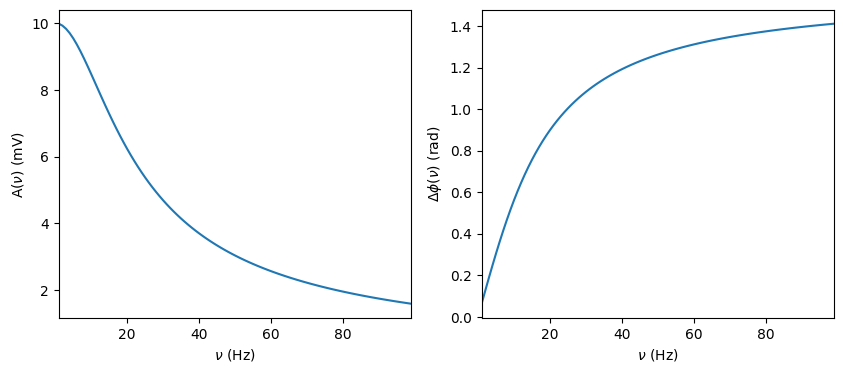

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(nu, A)
ax1.set_ylabel("A($\\nu$) (mV)")
ax1.set_xlabel("$\\nu$ (Hz)")
ax1.set_xlim([min(nu), max(nu)])

ax2.plot(nu, dphi)
ax2.set_ylabel("$\\Delta \\phi (\\nu)$ (rad)")
ax2.set_xlabel("$\\nu$ (Hz)")
ax2.set_xlim([min(nu), max(nu)])

# d)